In [1384]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Прямая задача

In [1385]:
def generate_3d_coord(range = 20):
    return np.random.rand(3) * range

In [1386]:
def generate_2d_coord(range = 20):
    return np.random.rand(2) * range

In [1387]:
a1 = generate_3d_coord()
print(a1)
a2 = generate_3d_coord()
print(a2)
a3 = generate_3d_coord()
print(a3)

[11.62204728  3.35573687 17.93884801]
[16.908794   14.86980213 10.21341655]
[15.97414025  8.49332084  2.84805004]


In [1388]:
def solve_plane_eq(a1, a2, a3):
    a = np.array([a1, a2, a3])
    b = [-1, -1, -1]
    x = np.linalg.solve(a, b)
    return x

In [1389]:
def get_plane_point(plane_coefs):
    point = generate_2d_coord()
    point_z = (-1 - plane_coefs[1] * point[1] - plane_coefs[0] * point[0]) / plane_coefs[2]
    point = np.append(point, [point_z])
    return point

In [1390]:
plane_coefs = solve_plane_eq(a1, a2, a3)
print(plane_coefs)

[-0.07386949  0.02543347 -0.01264481]


In [1391]:
a4 = get_plane_point(plane_coefs)
print(a4)

[11.38176521  3.9134742  20.46436706]


In [1392]:
a5 = generate_3d_coord()
print(a5)

[ 2.06354383  4.35934002 15.92438413]


In [1393]:
plane_coefs2 = solve_plane_eq(a1, a3, a5)
print(plane_coefs2)
a6 = get_plane_point(plane_coefs2)
print(a6)

[-0.00313753 -0.10010685 -0.0349857 ]
[17.91725624  1.78006839 21.88285296]


In [1394]:
plane_coefs3 = solve_plane_eq(a1, a2, a5)
print(plane_coefs3)
a7 = get_plane_point(plane_coefs3)
print(a7)

[ 0.00710421 -0.03887338 -0.05307568]
[14.79925377 19.93067291  6.22439971]


In [1395]:
a8 = solve_plane_eq(plane_coefs, plane_coefs2, plane_coefs3)
print(a8)

[11.62204728  3.35573687 17.93884801]


In [1396]:
a1 = [0, 0, 1]
a2 = [1, 0, 1]
a3 = [0, 1, 1]
a4 = [1, 1, 1]
a5 = [0, 0, 0]
a6 = [0, 1, 0]
a7 = [1, 0, 0]
a8 = [1, 1, 0]

In [1397]:
X = [a1[0], a2[0], a3[0], a4[0], a5[0], a6[0], a7[0], a8[0]]
Y = [a1[1], a2[1], a3[1], a4[1], a5[1], a6[1], a7[1], a8[1]]
Z = [a1[2], a2[2], a3[2], a4[2], a5[2], a6[2], a7[2], a8[2]]

In [1398]:
def plot_3d(X, Y, Z, times = 1):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X, Y, Z)
    for i in range(times):
        v = i * 8
        ax.plot([X[v + 0], X[v + 1]], [Y[v + 0],Y[v + 1]],zs=[Z[v + 0],Z[v + 1]])
        ax.plot([X[v + 0], X[v + 2]], [Y[v + 0],Y[v + 2]],zs=[Z[v + 0],Z[v + 2]])
        ax.plot([X[v + 3], X[v + 2]], [Y[v + 3],Y[v + 2]],zs=[Z[v + 3],Z[v + 2]])
        ax.plot([X[v + 3], X[v + 1]], [Y[v + 3],Y[v + 1]],zs=[Z[v + 3],Z[v + 1]])

        ax.plot([X[v + 0], X[v + 4]], [Y[v + 0],Y[v + 4]],zs=[Z[v + 0],Z[v + 4]])
        ax.plot([X[v + 5], X[v + 4]], [Y[v + 5],Y[v + 4]],zs=[Z[v + 5],Z[v + 4]])
        ax.plot([X[v + 5], X[v + 2]], [Y[v + 5],Y[v + 2]],zs=[Z[v + 5],Z[v + 2]])

        ax.plot([X[v + 6], X[v + 4]], [Y[v + 6],Y[v + 4]],zs=[Z[v + 6],Z[v + 4]])
        ax.plot([X[v + 6], X[v + 1]], [Y[v + 6],Y[v + 1]],zs=[Z[v + 6],Z[v + 1]])

        ax.plot([X[v + 6], X[v + 7]], [Y[v + 6],Y[v + 7]],zs=[Z[v + 6],Z[v + 7]])
        ax.plot([X[v + 3], X[v + 7]], [Y[v + 3],Y[v + 7]],zs=[Z[v + 3],Z[v + 7]])
        ax.plot([X[v + 5], X[v + 7]], [Y[v + 5],Y[v + 7]],zs=[Z[v + 5],Z[v + 7]])

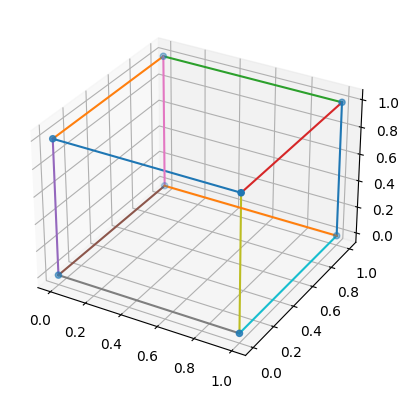

In [1399]:
plot_3d(X, Y, Z)

In [1400]:
V = generate_3d_coord(3)
print(V)

[2.88463084 1.3614697  1.05171401]


In [1401]:
def move_points(X, Y, Z, move_vector):
    X_new = []
    Y_new = []
    Z_new = []
    for i in range(8):
        X_new.append(X[i] + move_vector[0])
        Y_new.append(Y[i] + move_vector[1])
        Z_new.append(Z[i] + move_vector[2])
    return X_new, Y_new, Z_new

In [1402]:
X2, Y2, Z2 = move_points(X, Y, Z, V)
x = np.append(X, X2)
y = np.append(Y, Y2)
z = np.append(Z, Z2)
frames = 5
for i in range(frames - 2):
    X2, Y2, Z2 = move_points(X2, Y2, Z2, V)
    x = np.append(x, X2)
    y = np.append(y, Y2)
    z = np.append(z, Z2)

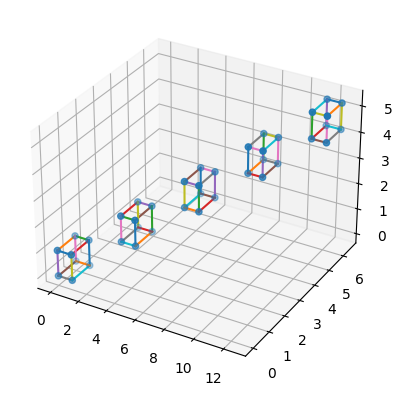

In [1403]:
plot_3d(x, y, z, 5)

In [1404]:
# camera = [0, 0, 0]
# o_x = 45
# o_y = 45
# o_z = 45
# matrix_1 = np.array([[1, 0, 0],[0, np.cos(o_x), np.sin(o_x)], [0, -np.sin(o_x), np.cos(o_x)]])

# matrix_2 = np.array([[np.cos(o_y), 0, -np.sin(o_y)],[0, 1, 0], [np.sin(o_y), 0, np.cos(o_y)]])

# matrix_3 = np.array([[np.cos(o_z), np.sin(o_z), 0], [-np.sin(o_z), np.cos(o_z), 0], [0, 0, 1]])

# P = np.matmul(np.matmul(matrix_1, matrix_2), matrix_3)


In [1405]:
# X_2d = []
# Y_2d = []
# f = 1
# for i in range(8 * 4):
#     tmp = np.array([x[i], y[i], z[i]])
#     proj = np.matmul(P, tmp)
#     # print(proj)
#     X_2d.append(f / (proj[2] + 1e-10) * proj[0])
#     Y_2d.append(f / (proj[2] + 1e-10) * proj[2])
#     # X_2d.append((x[i] * np.cos(a)) + (z[i] * np.sin(a)))
#     # Y_2d.append((x[i] * np.sin(a) * np.cos(b)) + (y[i] * np.cos(b)) - (z[i] * np.cos(a) * np.sin(b)))

In [1406]:
# plt.scatter(X_2d, Y_2d, c ="blue")
# plt.show()

In [1432]:

X_2d = []
Y_2d = []
distance_to_camera = 3
a = 45
b = 45

for j in range(5):
    min_ = 500
    min_i = -1
    for i in range(8):
        z_2d = (-x[8 * j +i] * np.sin(a) * np.cos(b)) + (y[8 * j +i] * np.sin(b)) + (z[8 * j +i] * np.cos(a) * np.cos(b))
        
        if (z_2d < min_):
            min_ = z_2d
            min_i = i

    print(min_)
    print(min_i)   

    for i in range(8):
        if i == min_i:
            continue

        if i == 10:
            continue
        X_2d.append((x[8 * j +i] * np.cos(a)) + (z[8 * j +i] * np.sin(a)))
        Y_2d.append((x[8 * j +i] * np.sin(a) * np.cos(b)) + (y[8 * j +i] * np.cos(b)) - (z[8 * j +i] * np.cos(a) * np.sin(b)))

    
        # X_2d.append(x[i] / (z[i] + 1e-15) * distance_to_camera)
        # Y_2d.append(y[i] / (z[i] + 1e-15) * distance_to_camera)

-0.446998331800279
6
-0.2877097848707118
6
-0.12842123794114502
6
0.030867308988422826
6
0.19015585591798856
6


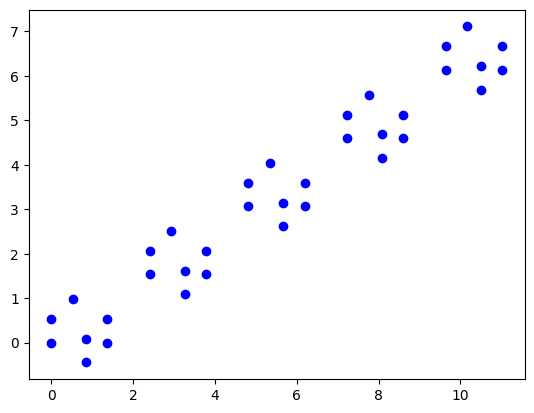

In [1433]:
plt.scatter(X_2d, Y_2d, c ="blue")
plt.show()

Обратная Задача

In [1437]:
print(X_2d)
print(Y_2d)

[0.8509035245341184, 1.3762255133518482, 0.8509035245341184, 1.3762255133518482, 0.0, 0.0, 0.5253219888177297, 3.261170694500979, 3.7864926833187083, 3.261170694500979, 3.7864926833187083, 2.4102671699668603, 2.4102671699668603, 2.93558915878459, 5.671437864467839, 6.1967598532855686, 5.671437864467839, 6.1967598532855686, 4.820534339933721, 4.820534339933721, 5.3458563287514504, 8.081705034434698, 8.607027023252428, 8.081705034434698, 8.607027023252428, 7.230801509900581, 7.230801509900581, 7.756123498718311, 10.49197220440156, 11.01729419321929, 10.49197220440156, 11.01729419321929, 9.641068679867441, 9.641068679867441, 10.166390668685171]
[-0.446998331800279, 0.0, 0.07832365701745075, 0.5253219888177296, 0.0, 0.5253219888177297, 0.9723203206180087, 1.0875224045366387, 1.5345207363369178, 1.6128443933543686, 2.0598427251546476, 1.5345207363369175, 2.059842725154647, 2.506841056954926, 2.622043140873556, 3.0690414726738355, 3.147365129691286, 3.5943634614915654, 3.069041472673835, 3.5

In [1434]:
def write_data(filename, data):
    with open(filename, 'w') as filehandle:
        for listitem in data:
            filehandle.write(f'{listitem}\n')

In [1436]:
buffer_x = []
for j in range(5):
    for i in range(7):
        if (i == 0 or i == 2 or i == 4):
            buffer_x.append(X_2d[7 * j + i])

buffer_y = []
for j in range(5):
    for i in range(7):
        if (i == 0 or i == 2 or i == 4):
            buffer_y.append(Y_2d[7 * j + i])
        

write_data("x_2d.txt", buffer_x)
write_data("y_2d.txt", buffer_y)

In [1442]:
a = [9.973896684, -2.188476533, 1.97361516, 3.934239385, -9.967341501, -1.013404925, -4.214127609, 1.056656774, 9.882405004, -0.04423926653, -1.773304937, 1.001822, -0.01104576489, -1.001195405, -0.03657984236, -0.008488885358, 1.445415127, 0.0116034199, -0.01892160348, 1.347717207, -0.0440887744, -0.02422489037, 1.614902043, -0.08030980579]

In [1443]:
P = np.array([[a[0], a[1], a[2], a[3]], [a[4], a[5], a[6], a[7]], [a[8], a[9], a[10], a[11]]])
V = np.array([a[12], a[13], a[14]])

X_a = np.array([a[15], a[16], a[17]])
X_e = np.array([a[18], a[19], a[20]])
X_j = np.array([a[21], a[22], a[23]])

In [1446]:
def solve_coord_eq(a1, a2, a3, b1, b2, b3):
    a = np.array([a1, a2, a3])
    b = [b1, b2, b3]
    x = np.linalg.solve(a, b)
    return x

In [ ]:
res_x = []
res_y = []
res_z = []
for i in range(7):
    x1 = X_2d[i]
    y1 = Y_2d[i]
    x2 = X_2d[i + 7]

    a1 = [x1*P[2][0] - P[0][0], x1*P[2][1] - P[0][1], x1*P[2][2] - P[0][2]]
    b1 = P[0][3] - x1*P[2][2]

    a2 = [y1*P[2][0] - P[1][0], y1*P[2][1] - P[1][1], y1*P[2][2] - P[1][2]]
    b2 = P[1][3] - y1*P[2][2]

    a3 = [x2*P[2][0] - P[0][0], x2*P[2][1] - P[0][1], x2*P[2][2] - P[0][2]]
    b3 = P[0][3] - x2*P[2][2] - V[0] * (x2*P[2][0] - P[0][0]) - V[1] * (x2*P[2][1] - P[0][1]) - V[2] * (x2*P[2][2] - P[0][2])

    cord = solve_coord_eq(a1, a2, a3, b1, b2, b3)
    res_x.append(cord[0])
    res_y.append(cord[1])
    res_z.append(cord[2])